### Libraries

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Dataset Preparation

#### Mapping Defined by:

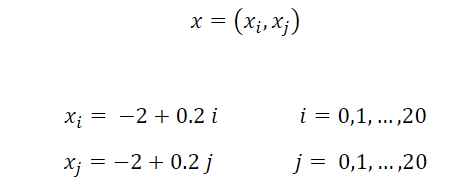

#### Training Set: 441 Samples [Format defined as below]

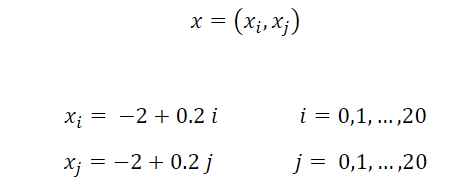

In [2]:
## Setting Seed
random.seed(42)

## Create Dataset
def Create_Dataset():
    
    ## Create Datapoints
    i=list(np.arange(21))
    j=list(np.arange(21))

    ## Create Inputs
    x=[-2+0.2*i for i in i]
    y=[-2+0.2*j for j in j]

    data=[]
    for i in x:
        for j in y:
            temp=[]
            temp.append(i)
            temp.append(j)
            data.append(temp)

    ## Create Data dataframe
    Dataset = pd.DataFrame(data)
    
    ##Create Labels dataframe
    labels=[]
    for i in data:
        x1=i[0]
        x2=i[1]
        f1 = x1**2+x2**2
        if f1 <= 1:
            labels.append(1)
        elif f1 > 1:
            labels.append(-1)

    ## Create Labels Dataframe
    labels = pd.DataFrame(labels, columns = ['Label'])

    ## Concatenate Data and Labels
    Complete_Data = pd.concat([Dataset, labels], axis=1)

    ## Shuffling the datapoints randomly
    Complete_Data = Complete_Data.sample(frac = 1)    
    
    ## Change to Numpy Array
    Complete_Data = np.array(Complete_Data)
    
    return Complete_Data

In [3]:
'''
Splitting Complete Dataset into:
- Train Data
- Train Labels
- Test Data
- Test Labels

'''

def Training_Testing_Splitting():
    ## Calling Complete Data
    Complete_Data = Create_Dataset()
    
    ## Split Training Data into Data and Labels using list splicing
    Training_data = Complete_Data[:352]
    Train_data = Training_data[:, :-1]
    Train_label = Training_data[:, 2:]

    ## Split Testing Data into Data and Labels using list splicing
    Testing_data = Complete_Data[352:]
    Test_data = Testing_data[:, :-1]
    Test_label = Testing_data[:, 2:]


    
    print("Full Dataset Details:\n")
    print('-------------------------------------------------')
    print("Complete Training Data + Labels:\n", Training_data)
    print('-------------------------------------------------')
    print("Complete Testing Data + Labels:\n", Testing_data)
    print('-------------------------------------------------')
    print("Shape of Complete Training Data: ", Training_data.shape)
    print('-------------------------------------------------')
    print("Shape of Complete Testing Data: ", Testing_data.shape)
    print('-------------------------------------------------')
    print("Only Training Data:\n", Train_data)
    print('-------------------------------------------------')
    print("Only Training Labels:\n", Train_label)
    print('-------------------------------------------------')
    print("Only Testing Data:\n", Test_data)
    print('-------------------------------------------------')
    print("Only Testing Label:\n", Test_label)
    
    return Training_data, Testing_data, Train_data, Train_label, Test_data, Test_label

In [4]:
## Assigning Data to their specific variables

Data = Training_Testing_Splitting()
Training_data = Data[0]
Testing_data = Data[1]
Train_data = Data[2]
Train_label = Data[3]
Test_data = Data[4]
Test_label = Data[5]

Full Dataset Details:

-------------------------------------------------
Complete Training Data + Labels:
 [[ 0.4 -0.8  1. ]
 [ 0.6 -1.4 -1. ]
 [-1.6  1.6 -1. ]
 ...
 [-1.6  1.2 -1. ]
 [ 1.4 -1.8 -1. ]
 [-1.6  0.6 -1. ]]
-------------------------------------------------
Complete Testing Data + Labels:
 [[-0.4 -1.  -1. ]
 [-0.8  0.2  1. ]
 [-2.   1.4 -1. ]
 [ 1.   2.  -1. ]
 [ 0.6 -0.6  1. ]
 [-1.2  2.  -1. ]
 [ 0.8 -1.8 -1. ]
 [ 0.8  0.6 -1. ]
 [-1.6  1.8 -1. ]
 [ 0.2 -0.4  1. ]
 [ 2.  -1.2 -1. ]
 [ 1.2  1.2 -1. ]
 [ 1.4 -0.6 -1. ]
 [ 0.  -1.8 -1. ]
 [ 1.8 -0.6 -1. ]
 [-1.8  0.2 -1. ]
 [ 0.8  2.  -1. ]
 [ 1.8 -1.  -1. ]
 [ 0.  -1.6 -1. ]
 [ 2.  -0.6 -1. ]
 [ 0.8  0.2  1. ]
 [ 0.4  0.   1. ]
 [-2.  -0.4 -1. ]
 [-1.4 -0.2 -1. ]
 [ 1.6  0.6 -1. ]
 [-1.4 -1.  -1. ]
 [-1.   0.4 -1. ]
 [-0.6 -1.2 -1. ]
 [ 0.2  1.6 -1. ]
 [ 0.4 -1.  -1. ]
 [ 1.  -1.  -1. ]
 [ 1.4  0.6 -1. ]
 [ 1.2  1.  -1. ]
 [-0.6  2.  -1. ]
 [ 0.2  1.2 -1. ]
 [-1.2 -0.8 -1. ]
 [ 1.8  0.  -1. ]
 [ 1.4 -0.4 -1. ]
 [ 1.8 -1.8 

### Calculate Hidden Neuron Output

In [5]:
'''
Hidden Neuron Output or output otained after applying Non linear Transformation on input samples.

'''
def Hidden_Neuron_Output(hidden_neurons, Train_data, sigma, centroids):
    
    G = np.ones((len(Train_data), hidden_neurons), dtype= float) ## Create Output Array of size (352, 352)
    
    '''
    Traverse each input sample and apply gaussian transformation on it in order to obtain Hidden neuron Outputs
    
    '''
    for m in range(len(Train_data)):
        for n in range(hidden_neurons):
            HN_Output = Gaussian_Transformation(G, Train_data, centroids, m, n, sigma) ## Apply Gaussian Transformation on all input samples of training data
            
    return HN_Output

### Gaussian Non Linear Transformation

In [6]:
'''
Apply Gaussian Transformation using the formula:

Non Linear Transformation (Gaussian) = (Distance)^2 / 2(Sigma)^2

'''
def Gaussian_Transformation(G, Train_data, centroids, m, n, sigma):
    D = np.linalg.norm(Train_data[m]-centroids[n]) ## Calculate Distance between each training data input sample and center sample
    G[m][n] = math.exp(-((D)**2) / (2*(sigma)**2)) ## Apply Transformation
    
    return G ## return Hidden neuron Output

### Weights Calculation (between Hidden and Output Layer)

In [7]:
'''
Weights between Hidden Neuron and Output Neuron

'''
def Weights_between_Hidden_Output(NLF, Train_label):
    '''
    Equation to calculate weights: 
    Weights = Inverse(G.Transpose x G) x (G.Transpose) x (True Training labels)
    
    '''
    G_product = np.dot(NLF.T,NLF) ## Calculate dot product of G and G transpose
    first_term = np.linalg.pinv(G_product) ## Calculating Inverse of above
    
    HN_output = np.dot(first_term, NLF.T) ## Calculate Hidden neuron output 
    
    OH_weights= np.dot(HN_output, Train_label) ## Calculate weights using Dot product of Hidden neuron outputs and Training labels
    
    return OH_weights

### Calculate Predicted Output

In [8]:
'''
Find Prediction:
- Create Output neuron value by computing dot product of Weight present between Hidden and Output layer with Output of Hidden layer neurons
- Pass the output to Signum function in order to obtain Predicted labels

'''
def find_prediction(weights_between_hidden_output, Output_HN):
    
    predicted_output = Output_HN.dot(weights_between_hidden_output) ## Dot Product
    final_predicted_output  = np.sign(predicted_output) ## Deploy Signum Function
    
    return final_predicted_output

### Calculate Accuracy

In [9]:
'''
Accuracy Function using Predicted labels and Test labels

'''
def find_accuracy(predicted_labels, original_label):
    
    counter = 0 ## Create Counter to check how many are predicted and actual labels are equal
    
    for i in range(len(predicted_labels)):
        if (predicted_labels[i] == original_label[i]).all(): ## Check for Equality
            counter += 1 ## Increase the counter
            
    Mean_Accuracy = counter/len(predicted_labels) ## Calculate the accuracy
    
    return Mean_Accuracy

### Calculate Mean Squared Error

In [10]:
'''
Calculate Mean Square Error using Predicted and Original Labels

'''
def Mean_Squared_Error(predicted_labels, original_label):
    
    counter = 0 ## Create Counter
    
    for i in range(len(predicted_labels)):
        counter += (predicted_labels[i]-original_label[i])**2 ## Summation of difference between predicted and original labels
        
    Error = counter/len(predicted_labels) ## Divide by total number of labels
    
    return Error

### Below mentioned 3 parts follows the same flow of functions, i.e.

1) Calculate Centroid

2) RBF_NN for Training Data

3) RBF_NN for Testing Data

4) Calculate Accuracy and Mean Squared Error for Training Data

5) Calculate Accuracy and Mean Squared Error for Testing Data

6) Plots

## Part: 1)

### Calculate Centroids (All the points of Training set as Centres of the RB Function)

In [11]:
def calculate_centroid_part1(hidden_neurons,Train_data):
    '''
    Centroid calculation is necessary for calculating the output of Hidden layer Neurons.
    In this case, we are taking all the input samples of training data as Centroids.
    i.e. 352 Centroids
    
    Hidden neurons is the length of training data i.e. 352
    
    '''
    centroids = [] ## Create an empty list to store centroids
    
    for i in range(hidden_neurons):
        centroids.append(Train_data[i]) ## Store each element of Training data in centroid list
        
    return centroids

### Training RBF Network

In [12]:
'''
Complete Implementation:
- Calculate centroids
- Calculate output of Hidden neurons
- Calculate Weights between Hidden and Output Layer
- Calculate output of Hidden neurons for Train data
- Calculate predicted labels
- Calculate Accuracy and Mean Squared Error

'''
def RBF_NN_train(sigma):
    Hidden_neurons = len(Train_data)
    centroids = calculate_centroid_part1(Hidden_neurons, Train_data)
    G_ret = Hidden_Neuron_Output(Hidden_neurons, Train_data, s, centroids)
    weights = Weights_between_Hidden_Output(G_ret,Train_label) ## weights between h and O
    weights_ts = Hidden_Neuron_Output(Hidden_neurons, Train_data, s, centroids) ## Output of Hidden layer neurons
    pred = find_prediction(weights,weights_ts) ## 
    Accuracy = (find_accuracy(pred, Train_label))
    print("Accuracy: ", Accuracy*100)
    Error = Mean_Squared_Error(pred, Train_label)
    print("Mean Square Error: ", Error)
    return Accuracy, Error

### Testing RBF Network

In [13]:
'''
Complete Implementation:
- Calculate centroids
- Calculate output of Hidden neurons
- Calculate Weights between Hidden and Output Layer
- Calculate output of Hidden neurons for Test data
- Calculate predicted labels
- Calculate Accuracy and Mean Squared Error

'''

def RBF_NN_test(sigma):
    Hidden_neurons = len(Train_data)
    centres = calculate_centroid_part1(Hidden_neurons, Train_data)
    G_ret = Hidden_Neuron_Output(Hidden_neurons, Train_data, s, centres)
    weights = Weights_between_Hidden_Output(G_ret, Train_label)
    weights_ts = Hidden_Neuron_Output(Hidden_neurons, Test_data, s, centres)
    pred = find_prediction(weights,weights_ts)
    Accuracy = find_accuracy(pred, Test_label)
    print("Accuracy: ", Accuracy*100)
    Error = Mean_Squared_Error(pred, Test_label)
    print("Mean Square Error: ", Error)
    return Accuracy, Error

### Calculate Accuracy and MSE for Training

In [14]:
## Initialize Total Accuracy and Error List which will store all the accuracies and error of different sigmas
Train_Accuracy_Part1 = []
Train_MSE_Part1 = []

## Different Sigma values for training
training_sigma = [0.001, 0.01, 0.05, 0.08, 0.1, 0.3, 0.5,0.7, 0.8, 1, 2, 3, 4, 5, 7, 8, 10, 13, 15, 18]

## for each Sigma, Calculate Accuracy and Mean Square Error
print('*********************START TRAINING******************************************')
for s in training_sigma:
    print('For Sigma: ', s)
    Train_Outputs = RBF_NN_train(s)
    Train_Accuracy_Part1.append(Train_Outputs[0])
    Train_MSE_Part1.append(Train_Outputs[1])
    print('------------------------------------')

*********************START TRAINING******************************************
For Sigma:  0.001
Accuracy:  100.0
Mean Square Error:  [0.]
------------------------------------
For Sigma:  0.01
Accuracy:  100.0
Mean Square Error:  [0.]
------------------------------------
For Sigma:  0.05
Accuracy:  100.0
Mean Square Error:  [0.]
------------------------------------
For Sigma:  0.08
Accuracy:  100.0
Mean Square Error:  [0.]
------------------------------------
For Sigma:  0.1
Accuracy:  100.0
Mean Square Error:  [0.]
------------------------------------
For Sigma:  0.3
Accuracy:  100.0
Mean Square Error:  [0.]
------------------------------------
For Sigma:  0.5
Accuracy:  100.0
Mean Square Error:  [0.]
------------------------------------
For Sigma:  0.7
Accuracy:  99.7159090909091
Mean Square Error:  [0.01136364]
------------------------------------
For Sigma:  0.8
Accuracy:  99.7159090909091
Mean Square Error:  [0.01136364]
------------------------------------
For Sigma:  1
Accuracy: 

### Calculate Accuracy and MSE for Testing

In [15]:
## Initialize Total Accuracy and Error List which will store all the accuracies and error of different sigmas
Test_Accuracy_Part1 = []
Test_MSE_Part1 = []

## Different Sigma Values for testing
test_sigma = [0.001, 0.01, 0.05, 0.08, 0.1, 0.3, 0.5,0.7, 0.8, 1, 2, 3, 4, 5, 7, 8, 10, 13, 15, 18]

## for each Sigma, Calculate Accuracy and Mean Square Error
print('*********************START TESTING******************************************')
for s in test_sigma:
    print('For Sigma: ', s)
    Test_Outputs = RBF_NN_test(s)
    Test_Accuracy_Part1.append(Test_Outputs[0])
    Test_MSE_Part1.append(Test_Outputs[1])
    print('------------------------------------')

*********************START TESTING******************************************
For Sigma:  0.001
Accuracy:  0.0
Mean Square Error:  [1.]
------------------------------------
For Sigma:  0.01
Accuracy:  95.50561797752809
Mean Square Error:  [0.17977528]
------------------------------------
For Sigma:  0.05
Accuracy:  95.50561797752809
Mean Square Error:  [0.17977528]
------------------------------------
For Sigma:  0.08
Accuracy:  95.50561797752809
Mean Square Error:  [0.17977528]
------------------------------------
For Sigma:  0.1
Accuracy:  95.50561797752809
Mean Square Error:  [0.17977528]
------------------------------------
For Sigma:  0.3
Accuracy:  92.13483146067416
Mean Square Error:  [0.31460674]
------------------------------------
For Sigma:  0.5
Accuracy:  96.62921348314607
Mean Square Error:  [0.13483146]
------------------------------------
For Sigma:  0.7
Accuracy:  96.62921348314607
Mean Square Error:  [0.13483146]
------------------------------------
For Sigma:  0.8
Accu

### Training Plot

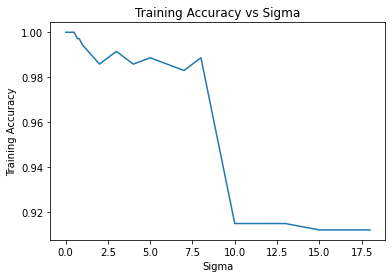

In [16]:
# Plot the Graph for Training Accuracy and Sigma values
import matplotlib.pyplot as plt

plt.plot(training_sigma, Train_Accuracy_Part1)
plt.xlabel('Sigma')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Sigma')
plt.show()

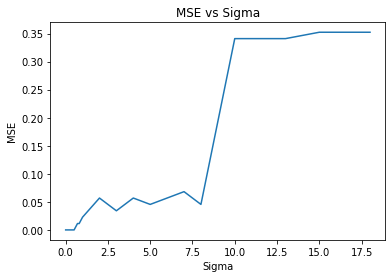

In [35]:
# Plot the Graph for Training Accuracy and Sigma values
import matplotlib.pyplot as plt

plt.plot(training_sigma, Train_MSE_Part1)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.title('MSE vs Sigma')
plt.show()

### Testing Plot

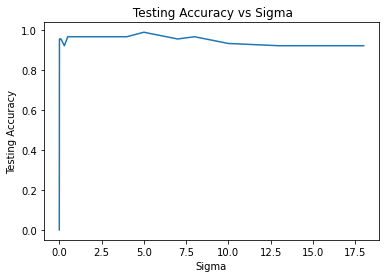

In [17]:
# Plot the Graph for Testing Accuracy and Sigma values
plt.plot(test_sigma, Test_Accuracy_Part1)
plt.xlabel('Sigma')
plt.ylabel('Testing Accuracy')
plt.title(' Testing Accuracy vs Sigma')
plt.show()

________________________________________________________________________________________________________________________________________________________________________________________________

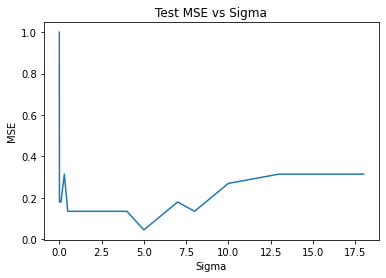

In [37]:
# Plot the Graph for Training Accuracy and Sigma values
import matplotlib.pyplot as plt

plt.plot(training_sigma, Test_MSE_Part1)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.title('Test MSE vs Sigma')
plt.show()

## Part:2) Using 150 Hidden Nodes as Centroids

(Same Flow of Functions as part 1)

In [18]:
'''
Only 150 random centroids will be considered now instead of taking all training samples as centroid.

'''
def calculate_centroid_150(Hidden_neurons, Train_data):
    centroids = []
    for i in range(Hidden_neurons):
        centroids.append(Train_data[np.random.randint(0,352)])
    return centroids

In [19]:
'''
Complete Implementation:
- Calculate centroids
- Calculate output of Hidden neurons
- Calculate Weights between Hidden and Output Layer
- Calculate output of Hidden neurons for Train data
- Calculate predicted labels
- Calculate Accuracy and Mean Squared Error
'''

def RBF_NN_train_part2(i):
    Hidden_neurons = 150
    centroids = calculate_centroid_150(Hidden_neurons, Train_data)
    G_ret = Hidden_Neuron_Output(Hidden_neurons, Train_data, i, centroids)
    weights = Weights_between_Hidden_Output(G_ret, Train_label)
    weights_ts = Hidden_Neuron_Output(Hidden_neurons, Train_data, i, centroids)
    pred = find_prediction(weights,weights_ts)
    Accuracy = find_accuracy(pred, Train_label)
    Error = Mean_Squared_Error(pred, Train_label)
    print("Accuracy: ", Accuracy*100)
    print("Mean Square Error: ", Error)
    
    return Accuracy, Error
    

In [20]:
'''
Complete Implementation:
- Calculate centroids
- Calculate output of Hidden neurons
- Calculate Weights between Hidden and Output Layer
- Calculate output of Hidden neurons for Test data
- Calculate predicted labels
- Calculate Accuracy and Mean Squared Error

'''

def RBF_NN_test_part2(i):
    Hidden_neurons = 150
    centroids = calculate_centroid_150(Hidden_neurons, Train_data)
    G_ret = Hidden_Neuron_Output(Hidden_neurons, Train_data, i, centroids)
    weights = Weights_between_Hidden_Output(G_ret, Train_label)
    weights_ts = Hidden_Neuron_Output(Hidden_neurons, Test_data, i, centroids)
    pred = find_prediction(weights,weights_ts)
    Accuracy = find_accuracy(pred, Test_label)
    Error = Mean_Squared_Error(pred, Test_label)
    print("Accuracy: ", Accuracy*100)
    print("Mean Square Error: ", Error)
    
    return Accuracy, Error
    

In [21]:
## Initialize Total Accuracy and Error List which will store all the accuracies and error of different sigmas
Train_Accuracy_Part2 = []
Train_MSE_Part2 = []

training_sigma_2 = [0.001, 0.01, 0.05, 0.08, 0.1, 0.3, 0.5,0.7, 0.8, 1, 2, 3, 4, 5, 7, 8, 10, 13, 15, 18]

## for each Sigma, Calculate Accuracy and Mean Square Error
print('*********************START TRAINING******************************************')
for i in training_sigma_2:
    print('For Sigma: ', i)
    Train_Outputs = RBF_NN_train_part2(i)
    Train_Accuracy_Part2.append(Train_Outputs[0])
    Train_MSE_Part2.append(Train_Outputs[1])
    print('------------------------------------')

*********************START TRAINING******************************************
For Sigma:  0.001
Accuracy:  35.51136363636363
Mean Square Error:  [0.64488636]
------------------------------------
For Sigma:  0.01
Accuracy:  87.7840909090909
Mean Square Error:  [0.22443182]
------------------------------------
For Sigma:  0.05
Accuracy:  97.72727272727273
Mean Square Error:  [0.09090909]
------------------------------------
For Sigma:  0.08
Accuracy:  96.875
Mean Square Error:  [0.125]
------------------------------------
For Sigma:  0.1
Accuracy:  97.72727272727273
Mean Square Error:  [0.09090909]
------------------------------------
For Sigma:  0.3
Accuracy:  99.43181818181817
Mean Square Error:  [0.02272727]
------------------------------------
For Sigma:  0.5
Accuracy:  99.7159090909091
Mean Square Error:  [0.01136364]
------------------------------------
For Sigma:  0.7
Accuracy:  99.7159090909091
Mean Square Error:  [0.01136364]
------------------------------------
For Sigma:  0.8


In [22]:
## Initialize Total Accuracy and Error List which will store all the accuracies and error of different sigmas
Test_Accuracy_Part2 = []
Test_MSE_Part2 = []

testing_sigma_2 = [0.001, 0.01, 0.05, 0.08, 0.1, 0.3, 0.5,0.7, 0.8, 1, 2, 3, 4, 5, 7, 8, 10, 13, 15, 18]

print('*********************START TESTING******************************************')
for i in testing_sigma_2:
    print('For Sigma: ', i)
    Test_Outputs = RBF_NN_test_part2(i)
    Test_Accuracy_Part2.append(Test_Outputs[0])
    Test_MSE_Part2.append(Test_Outputs[1])
    print('------------------------------------')
   

*********************START TESTING******************************************
For Sigma:  0.001
Accuracy:  0.0
Mean Square Error:  [1.]
------------------------------------
For Sigma:  0.01
Accuracy:  84.26966292134831
Mean Square Error:  [0.35955056]
------------------------------------
For Sigma:  0.05
Accuracy:  94.3820224719101
Mean Square Error:  [0.2247191]
------------------------------------
For Sigma:  0.08
Accuracy:  94.3820224719101
Mean Square Error:  [0.2247191]
------------------------------------
For Sigma:  0.1
Accuracy:  93.25842696629213
Mean Square Error:  [0.26966292]
------------------------------------
For Sigma:  0.3
Accuracy:  96.62921348314607
Mean Square Error:  [0.13483146]
------------------------------------
For Sigma:  0.5
Accuracy:  96.62921348314607
Mean Square Error:  [0.13483146]
------------------------------------
For Sigma:  0.7
Accuracy:  96.62921348314607
Mean Square Error:  [0.13483146]
------------------------------------
For Sigma:  0.8
Accuracy

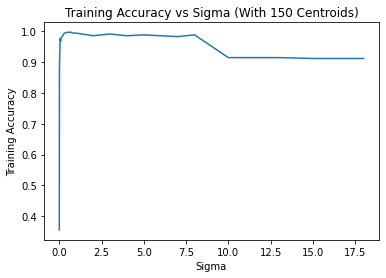

In [23]:
# Plot the Graph for Training Accuracy and Sigma values
plt.plot(training_sigma_2, Train_Accuracy_Part2)
plt.xlabel('Sigma')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Sigma (With 150 Centroids)')
plt.show()

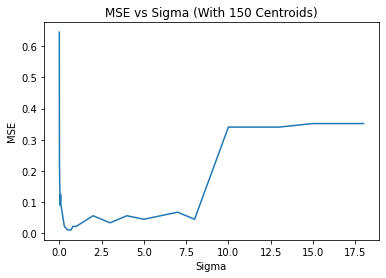

In [34]:
# Plot the Graph for MSE and Sigma values
plt.plot(training_sigma_2, Train_MSE_Part2)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.title('MSE vs Sigma (With 150 Centroids)')
plt.show()

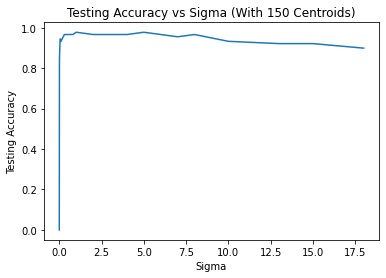

In [24]:
# Plot the Graph for Testing Accuracy and Sigma values
plt.plot(testing_sigma_2, Test_Accuracy_Part2)
plt.xlabel('Sigma')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs Sigma (With 150 Centroids)')
plt.show()

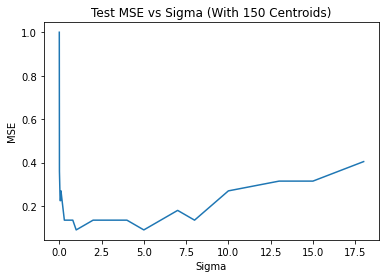

In [38]:
# Plot the Graph for MSE and Sigma values
plt.plot(training_sigma_2, Test_MSE_Part2)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.title('Test MSE vs Sigma (With 150 Centroids)')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part:3) Choose 150 Centers using Kmeans Algorithm

(same Function Flow as previous part)

In [25]:
## Import Kmeans from sklearn library
from sklearn.cluster import KMeans

In [26]:
'''
In this part, we have to choose 150 centers using KMeans Algorithm in available sklearn Library

'''
def calculate_centroid_kmeans(Hidden_neurons, Train_data):
    centroids = [] ## List to store all centroids
    K_centroids = KMeans(n_clusters= Hidden_neurons, max_iter= 100) ## Create KMeans Implementer
    K_centroids.fit(Train_data) ## Fit Train data
    centroids= K_centroids.cluster_centers_ ## To find centers or centroids
    
    return centroids  

In [27]:
'''
Complete Implementation:
- Calculate centroids
- Calculate output of Hidden neurons
- Calculate Weights between Hidden and Output Layer
- Calculate output of Hidden neurons for Train data
- Calculate predicted labels
- Calculate Accuracy and Mean Squared Error
'''

def RBF_NN_train_kmeans(i):
    Hidden_neurons = 150
    centroids = calculate_centroid_kmeans(Hidden_neurons, Train_data)
    G_ret = Hidden_Neuron_Output(Hidden_neurons, Train_data, i, centroids)
    weights = Weights_between_Hidden_Output(G_ret, Train_label)
    weights_ts = Hidden_Neuron_Output(Hidden_neurons, Train_data, i, centroids)
    pred = find_prediction(weights,weights_ts)
    Accuracy = find_accuracy(pred, Train_label)
    Error = Mean_Squared_Error(pred, Train_label)
    print("Accuracy: ", Accuracy*100)
    print("Mean Square Error: ", Error)
    
    return Accuracy, Error
    

In [28]:
'''
Complete Implementation:
- Calculate centroids
- Calculate output of Hidden neurons
- Calculate Weights between Hidden and Output Layer
- Calculate output of Hidden neurons for Test data
- Calculate predicted labels
- Calculate Accuracy and Mean Squared Error

'''

def RBF_NN_test_kmeans(i):
    Hidden_neurons = 150
    centroids = calculate_centroid_kmeans(Hidden_neurons, Train_data)
    G_ret = Hidden_Neuron_Output(Hidden_neurons, Train_data, i, centroids)
    weights = Weights_between_Hidden_Output(G_ret, Train_label)
    weights_ts = Hidden_Neuron_Output(Hidden_neurons, Test_data, i, centroids)
    pred = find_prediction(weights,weights_ts)
    Accuracy = find_accuracy(pred, Test_label)
    Error = Mean_Squared_Error(pred, Test_label)
    print("Accuracy: ", Accuracy*100)
    print("Mean Square Error: ", Error)
    
    return Accuracy, Error

In [29]:
## Initialize Total Accuracy and Error List which will store all the accuracies and error of different sigmas
Train_Accuracy_kmeans = []
Train_MSE_kmeans = []

## Training Sigma values
training_sigma_kmeans = [0.001, 0.01, 0.05, 0.08, 0.1, 0.3, 0.5,0.7, 0.8, 1, 2, 3, 4, 5, 7, 8, 10, 13, 15, 18]

print('*********************START TRAINING******************************************')
for i in training_sigma_kmeans:
    print('For Sigma: ', i)
    Train_Outputs = RBF_NN_train_kmeans(i)
    Train_Accuracy_kmeans.append(Train_Outputs[0])
    Train_MSE_kmeans.append(Train_Outputs[1])
    print('------------------------------------')
   

*********************START TRAINING******************************************
For Sigma:  0.001
Accuracy:  7.386363636363637
Mean Square Error:  [0.92613636]
------------------------------------
For Sigma:  0.01
Accuracy:  56.53409090909091
Mean Square Error:  [1.73863636]
------------------------------------
For Sigma:  0.05
Accuracy:  98.01136363636364
Mean Square Error:  [0.07954545]
------------------------------------
For Sigma:  0.08
Accuracy:  98.57954545454545
Mean Square Error:  [0.05681818]
------------------------------------
For Sigma:  0.1
Accuracy:  98.01136363636364
Mean Square Error:  [0.07954545]
------------------------------------
For Sigma:  0.3
Accuracy:  99.7159090909091
Mean Square Error:  [0.01136364]
------------------------------------
For Sigma:  0.5
Accuracy:  99.7159090909091
Mean Square Error:  [0.01136364]
------------------------------------
For Sigma:  0.7
Accuracy:  99.7159090909091
Mean Square Error:  [0.01136364]
------------------------------------


In [30]:
## Initialize Total Accuracy and Error List which will store all the accuracies and error of different sigmas
Test_Accuracy_kmeans = []
Test_MSE_kmeans = []

# Testing Sigma Values
testing_sigma_kmeans = [0.001, 0.01, 0.05, 0.08, 0.1, 0.3, 0.5,0.7, 0.8, 1, 2, 3, 4, 5, 7, 8, 10, 13, 15, 18]

print('*********************START TESTING******************************************')
for i in testing_sigma_kmeans:
    print('For Sigma: ', i)
    Test_Outputs = RBF_NN_test_kmeans(i)
    Test_Accuracy_kmeans.append(Test_Outputs[0])
    Test_MSE_kmeans.append(Test_Outputs[1])
    print('------------------------------------')
    
    

*********************START TESTING******************************************
For Sigma:  0.001
Accuracy:  0.0
Mean Square Error:  [1.]
------------------------------------
For Sigma:  0.01
Accuracy:  62.92134831460674
Mean Square Error:  [1.48314607]
------------------------------------
For Sigma:  0.05
Accuracy:  98.87640449438202
Mean Square Error:  [0.04494382]
------------------------------------
For Sigma:  0.08
Accuracy:  96.62921348314607
Mean Square Error:  [0.13483146]
------------------------------------
For Sigma:  0.1
Accuracy:  93.25842696629213
Mean Square Error:  [0.26966292]
------------------------------------
For Sigma:  0.3
Accuracy:  95.50561797752809
Mean Square Error:  [0.17977528]
------------------------------------
For Sigma:  0.5
Accuracy:  96.62921348314607
Mean Square Error:  [0.13483146]
------------------------------------
For Sigma:  0.7
Accuracy:  95.50561797752809
Mean Square Error:  [0.17977528]
------------------------------------
For Sigma:  0.8
Accu

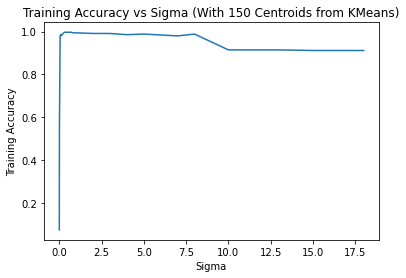

In [31]:
# Plot the Graph for Training Accuracy and Sigma values
plt.plot(training_sigma_kmeans, Train_Accuracy_kmeans)
plt.xlabel('Sigma')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Sigma (With 150 Centroids from KMeans)')
plt.show()

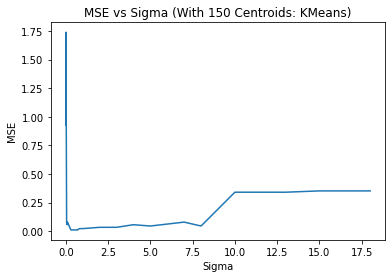

In [40]:
# Plot the Graph for MSE and Sigma values
plt.plot(training_sigma_2, Train_MSE_kmeans)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.title('MSE vs Sigma (With 150 Centroids: KMeans)')
plt.show()

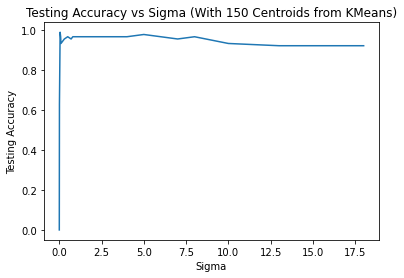

In [32]:
# Plot the Graph for Testing Accuracy and Sigma values
plt.plot(testing_sigma_kmeans, Test_Accuracy_kmeans)
plt.xlabel('Sigma')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs Sigma (With 150 Centroids from KMeans)')
plt.show()

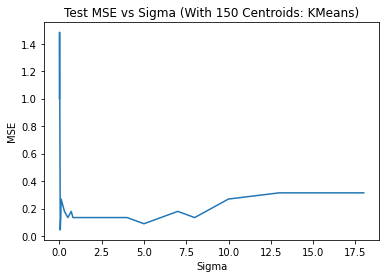

In [41]:
# Plot the Graph for MSE and Sigma values
plt.plot(training_sigma_2, Test_MSE_kmeans)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.title('Test MSE vs Sigma (With 150 Centroids: KMeans)')
plt.show()

## Performance Analysis of all combinations:

### Parameter:

Following Sigma’s has been used in all the 3 parts:

Sigma = [0.001, 0.01, 0.05, 0.08, 0.1, 0.3, 0.5,0.7, 0.8, 1, 2, 3, 4, 5, 7, 8, 10, 13, 15, 18]

[NOTE: After 18-20, accuracies for all parts were coming constant]

### Part (1): Using all points in the training set as centers for the RB Function

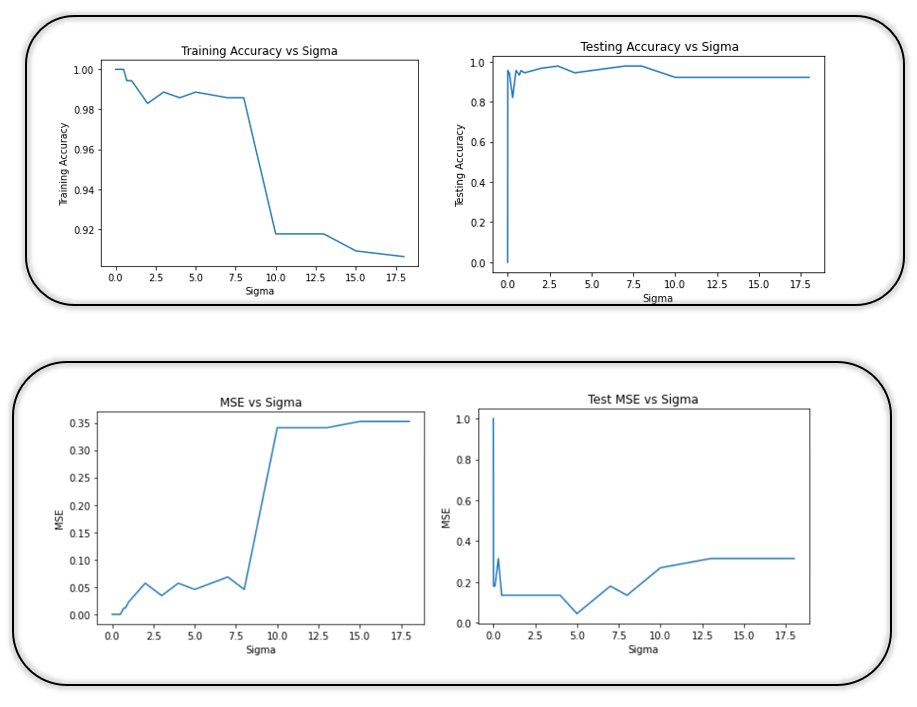

#### Training Analysis:
•	Best Training Accuracy of 99.71% is obtained in the range of sigma = 0.7 because of good interpolation at higher widths. i.e. close to the real gaussian curve.

•	After 0.5, Training Accuracy has been decreased slightly till sigma =8, after which sudden decrement in accuracy is observed.

•	Range of Mean Square Error: [0 – 0.375]

#### Testing Analysis:
•	Best Testing Accuracy has been observed at sigma = [3, 7, 8]

•	Range of Mean Square Error: [0.089 – 1.00]

•	Minimum Mean Square Error 0.034 has been observed at accuracies 3, 7, 8, reason being approximation by RBF Function could be identical or real close to real curve.

•	Less Accuracy has been observed for initial sigma’s because of poor interpolation at lower widths.

•	Overfitting case might be observed at Sigma = [0.001 – 0.05], where for training we have 100% accuracy with 0 MSE and for testing we received 0% accuracy with 1 MSE.

### Part (2): Using 150 random centers from input data for the RB Function

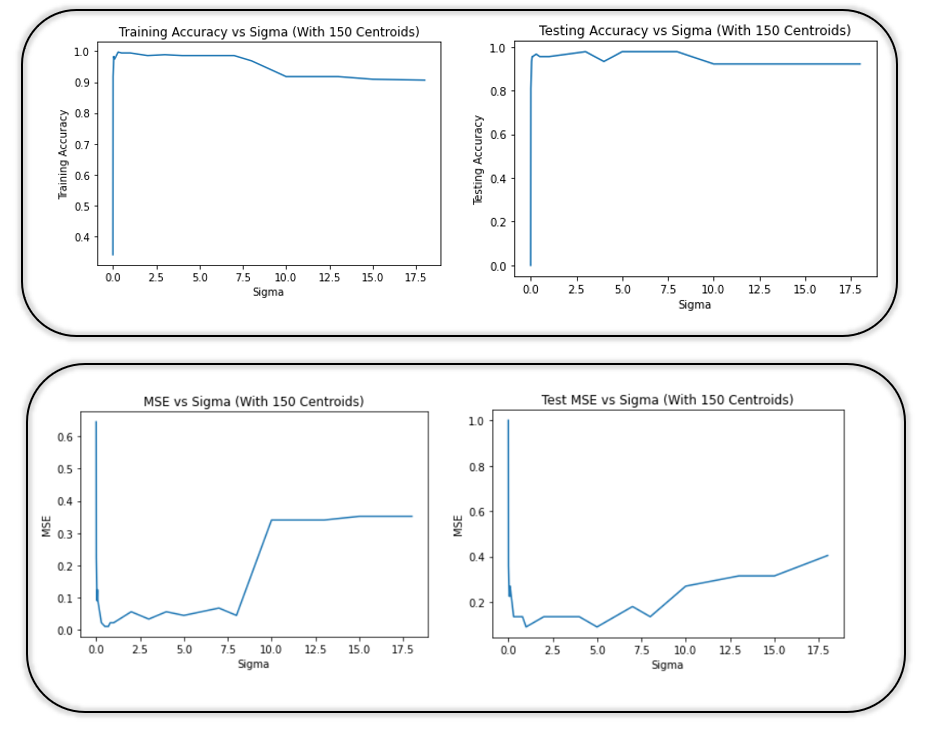

#### Training Analysis:
•	Best Training Accuracy of 99.715% is obtained for Sigma = 0.3 with Mean Square Error = 0.011

•	For initial sigma’s, training accuracy has been increased drastically i.e. from sigma 0.001 to 0.05, after which accuracy remained approximately between 98 - 99% till sigma =8, where after steep decrease in accuracy from 97 to 91% has been observed. 	

#### Testing Analysis: 
•	Best Testing Accuracy of 97.75% is obtained for Sigma = 3, 5, 7, 8 with Mean Square Error = 0.089

•	Significant increase in accuracy for initial sigma’s till 0.1, after which accuracy remained in the range of approximately 96-97% and starts decreasing after sigma =8



### Part (3): Using 150 random centers from KMeans Algorithm for the RB Function

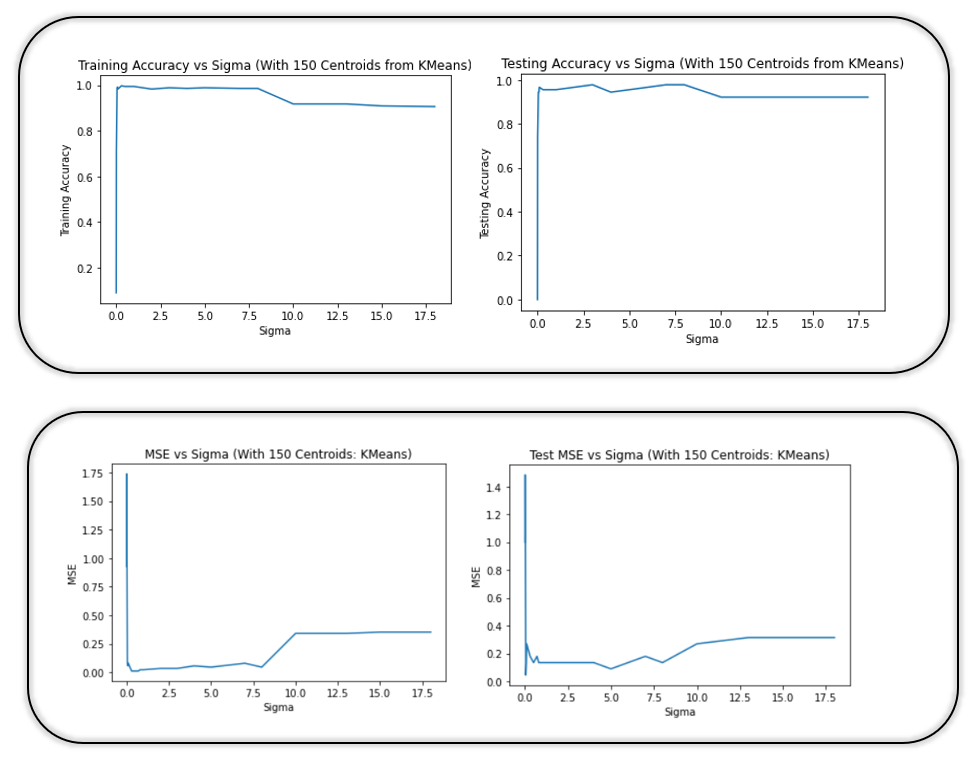

#### Training Analysis:
•	Maximum Training Accuracy is 99.715% at sigma = 0.3, 0.5 and 0.7, with MSE = 0.011

•	Training Accuracy faces a steep increase with the increase in initial sigma (0.001, 0.01, 0.05)

•	Accuracy starts drooping after sigma = 3 and steep decrement occurred from sigma = 10



#### Testing Analysis:
•	Maximum Testing Accuracy is 98.87% at sigma = 0.05, with MSE = 0.044, i.e. at lower sigma higher width has been obtained leading to better interpolation as compared to other sigma values.

•	Testing Accuracy also faces steep increase with the increase in initial sigma (0.001, 0.01, 0.05)

•	During the mid range of sigma, Accuracy fluctuated between approximately 94-97%.

•	During the last sigma values, accuracy become constant at 92.13%.


#### Final Remarks:
1. Sigma 3 can be considered as optimal sigma since one of the highest accuracies has been observed for the same, i.e. curve created by RBF NN is close to the real gaussian curve.

2. On comparing all three cases, it is observed that taking 150 random centroids has shown the best optimal accuracy with minimum sigma as compared to taking all 441 centroids. 
